In [1]:
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
from darkrate_fxns_sam import *

In [2]:
# acquire all file names in directory
filespath = '/Users/samuelfogarty/OneDrive/Desktop/OneDrive/photondetectortests/dune_fd_pds_data/singlephotonsearch/'
#abovebreakdown = '12usecwindow__25MHzSR_1kpts_10mVperdiv_ch4_44.135Bias'
#belowbreakdown = '12usecwindow_25MHzSR_1kpts_10mVperdiv_ch4_10.932VBias'
abovebreakdown = '10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_44.135VBias'
belowbreakdown = '10mswindow_25MHzSR_1kpts_10mVperdiv_ch4_10.935VBias'

# file path of each directory
filespath_bbd = filespath + belowbreakdown
filespath_abd = filespath + abovebreakdown
# list of file names in each directory
filenames_bbd = os.listdir(filespath_bbd)
filenames_abd = os.listdir(filespath_abd)

In [3]:
filepath_abd = filespath_abd + '/' + filenames_abd[0]
t, V = getData(filepath_abd)
photon_candidates,window_start_indices, window_end_indices = np.array(findcandidates(t,V))

/Users/samuelfogarty/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [5]:
print("The number of infinities abd = ",np.sum(np.isinf(photon_candidates)))
selectinfinities_abd = np.isinf(photon_candidates)

The number of infinities abd =  955


In [6]:
window_start_indices_infinities = window_start_indices[selectinfinities_abd]
window_end_indices_infinities = window_end_indices[selectinfinities_abd]

In [20]:
start_index = window_start_indices_infinities[7]
end_index = window_end_indices_infinities[7]
print(start_index, end_index)

132961.0 132986.0


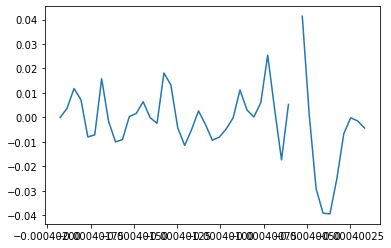

In [21]:
window = 10 # points
start_index_plot = int(start_index) - window
end_index_plot = int(end_index) + window
plt.plot(t[start_index_plot:end_index_plot],V[start_index_plot:end_index_plot])